# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-19 21:50:21--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv’

banana_quality.csv  100%[===================>] 615.24K  --.-KB/s    in 0.03s   

2025-03-19 21:50:21 (20.8 MB/s) - ‘banana_quality.csv’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [3]:
df.info()

df.describe()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.

In [ ]:
df['Quality'].value_counts()

,count
Quality,
Good,4006
Bad,3994


## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [ ]:

df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})
(df['Quality'].value_counts())


,count
Quality,
1,4006
0,3994


## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [ ]:
X = df[['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']]
y = df['Quality']


## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



## Paso 8: Validación del Balanceo de Clases


Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.

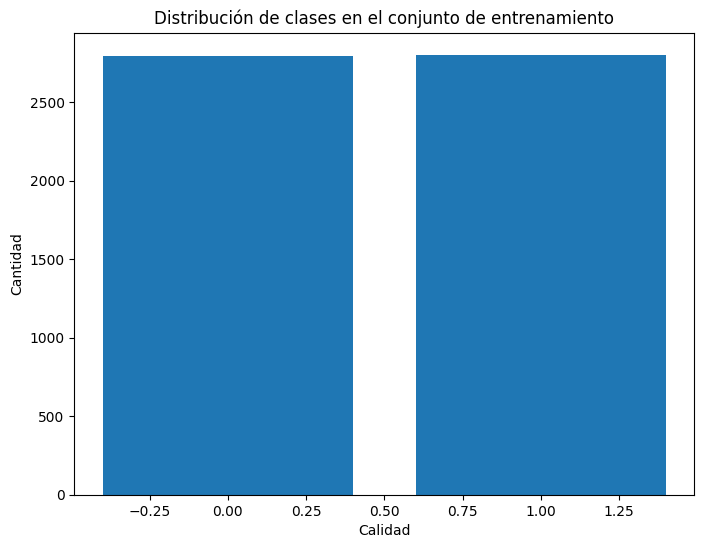

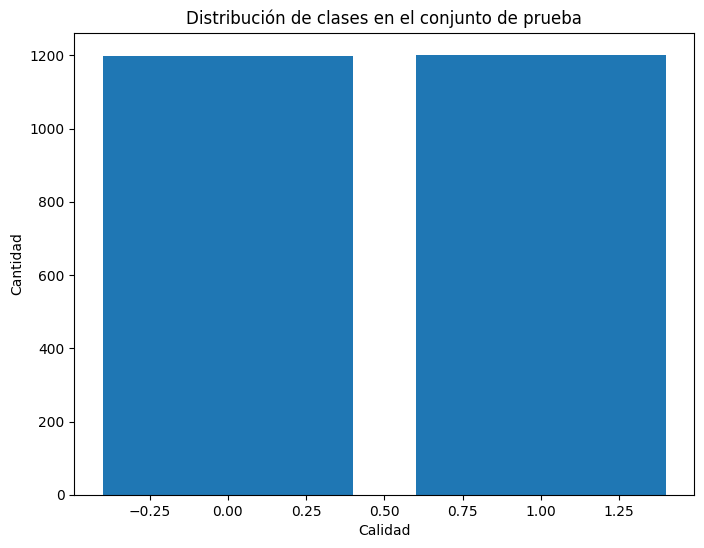

In [ ]:
train_counts = y_train.value_counts()

test_counts = y_test.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(train_counts.index, train_counts.values)
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(test_counts.index, test_counts.values)
plt.title('Distribución de clases en el conjunto de prueba')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()


## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [ ]:
y_pred = model.predict(X_test)

## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", report)


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1198
           1       0.86      0.89      0.87      1202

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

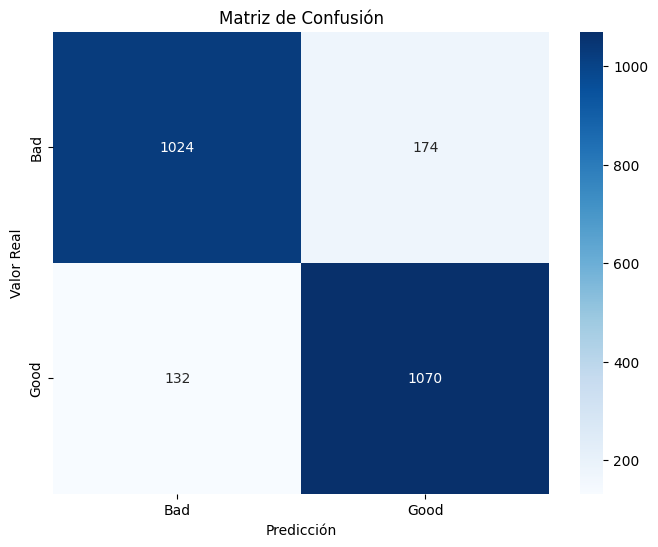

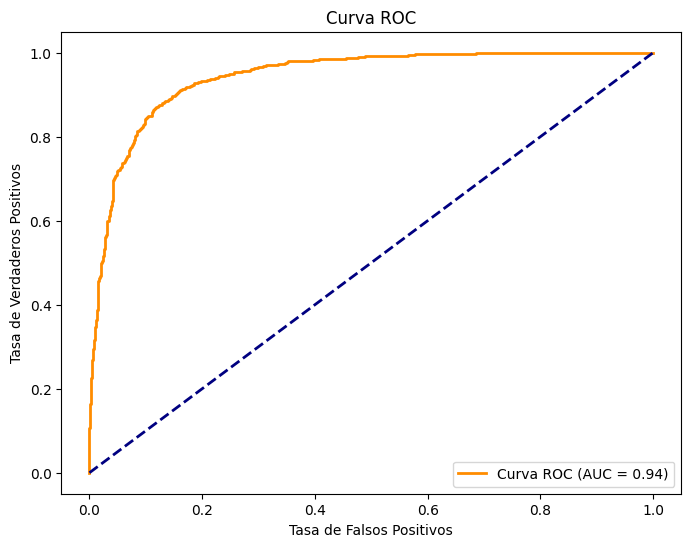

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [17]:
# prompt: Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).
# Al inicio pon para Profesor Javier y al final cordialmente: Paula Maldonado
# No olviudes definir bien las variables y sin erorresdefine y test

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ## Paso 13 (Opcional): Envío de Métricas por Correo
#
# Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

print("Profesor Javier")

# Calcular las métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc  # AUC ya calculada anteriormente

# Generar resumen de métricas
print("Resumen de Métricas:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

print("Cordialmente:")
print("Paula Maldonado")


Profesor Javier
Resumen de Métricas:
Accuracy: 0.8725
Precisión: 0.8601
Recall: 0.8902
F1-Score: 0.8749
AUC: 0.9431
Cordialmente:
Paula Maldonado


## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.